### Introduction: Project Goal
    
The goal of this project is to visualize ecommerce fashion data and use data science methods to understand product classifications and inights.

### Data and Methodology
This Ecommerce dataset contains over 30K products and the dataset is located here: https://www.kaggle.com/datasets/mukuldeshantri/ecommerce-fashion-dataset

In [5]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/yzhou/Fashiondataset.csv")
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [7]:
print(df.shape)
df.info()

(30758, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


Convert SellPrice and Discount to numeric

In [8]:
df['SellPrice'] = df['SellPrice'].fillna('0').replace({'Nan':'0'})
df['SellPrice'] = pd.to_numeric(df['SellPrice'])
df['Discount'] = df['Discount'].fillna('0').replace({'Nan':'0','5% off':'05% off','4% off': '04% off'})
df.sort_values('Discount',ascending=True, inplace=True)
print(df.head())

       Unnamed: 0 BrandName  \
30757          25   estelle   
23465          13    enamor   
8666            8      life   
23464          12    amante   
23463          11    enamor   

                                                 Deatils  \
30757  womens gold plated bridge designer mangalsutra...   
23465  non wired racerback straps non padded womens b...   
8666   womens 5 pocket distressed jeans - denim indig...   
23464  blended intimatewear womens bikini briefs - ol...   
23463        low waist co-ordinate lace panty - sky blue   

                                                   Sizes  MRP  SellPrice  \
30757                                                Nan  Nan       1899   
23465  Size:34-B,34-C,34-D,34-Z,36-B,36-C,36-D,36-Z,3...  Nan        849   
8666                                             Size:30  Nan       1899   
23464                                 Size:Large,X-Large  Nan        545   
23463           Size:Large,Medium,Small,X-Large,XX-Large  Nan        499

In [9]:
print(df['Discount'].unique())

['0' '0% off' '04% off' '05% off' '10% off' '12% off' '15% off' '17% off'
 '20% off' '22% off' '23% off' '24% off' '25% off' '26% off' '27% off'
 '28% off' '29% off' '30% off' '31% off' '32% off' '33% off' '34% off'
 '35% off' '36% off' '37% off' '38% off' '39% off' '40% off' '41% off'
 '42% off' '43% off' '44% off' '45% off' '47% off' '48% off' '50% off'
 '51% off' '52% off' '53% off' '54% off' '55% off' '56% off' '57% off'
 '58% off' '60% off' '61% off' '62% off' '63% off' '64% off' '65% off'
 '66% off' '67% off' '68% off' '69% off' '70% off' '71% off' '72% off'
 '73% off' '74% off' '75% off' '76% off' '77% off' '78% off' '79% off'
 '80% off' '85% off']


In [10]:
print(df['MRP'].unique())

['Nan' 'Rs\n999' 'Rs\n1249' ... 'Rs\n11250' 'Rs\n6750' 'Rs\n6899']


#### Visualize the SellPrice vs. Discount
Insights:
* Discounts tend to hover around each decile, e.g. 10%, 20%, ..., 50% instead of in between percentages
* Most discounts tend to be 40% or lower

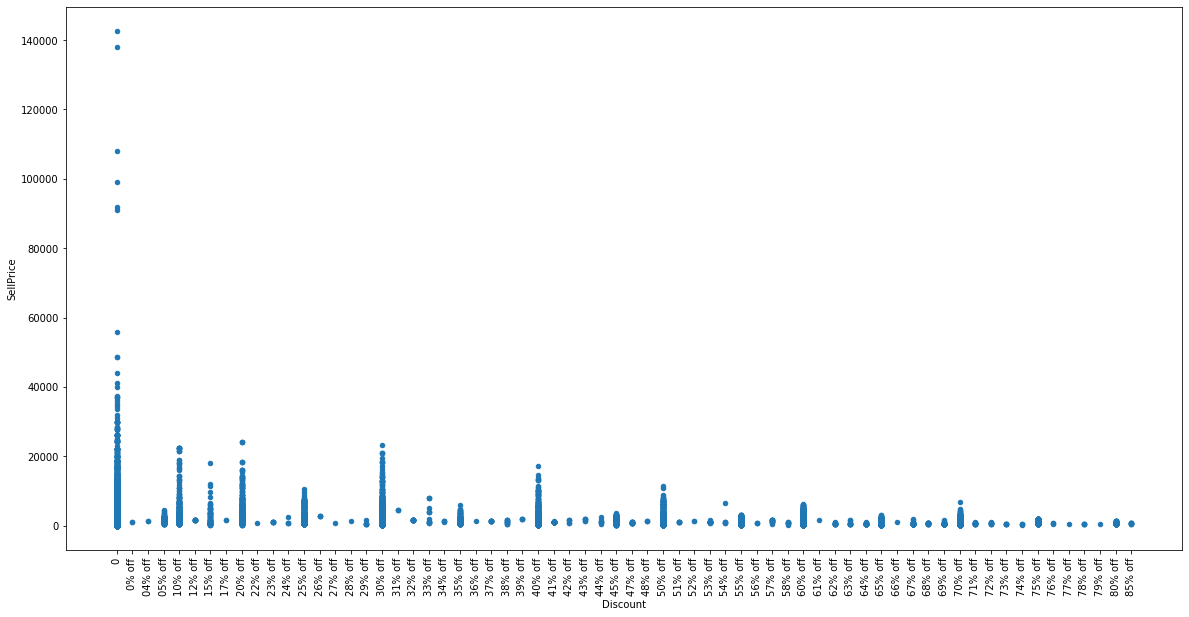

In [11]:
plot_discount = df.plot.scatter(x='Discount', y='SellPrice', figsize=(20, 10), rot=90)

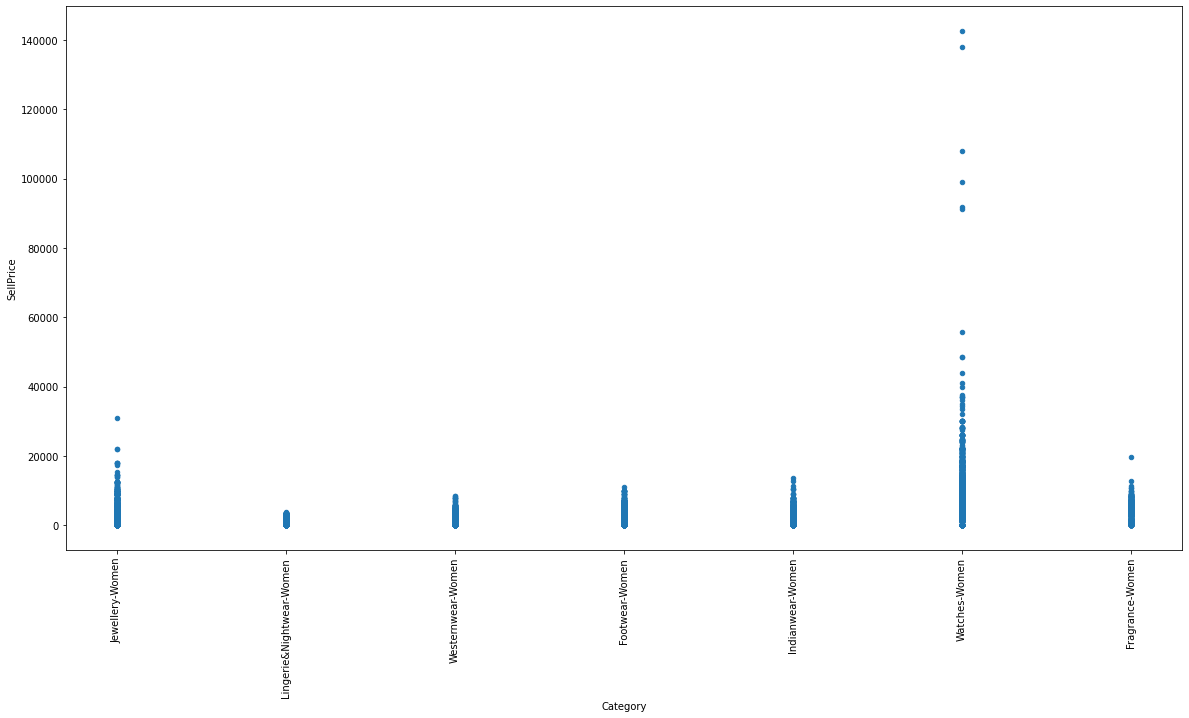

In [12]:
plot_sellprice = df.plot.scatter(x='Category', y='SellPrice', figsize=(20, 10), rot=90)

#### Visualize the Discount vs. Category
Insights:
* Fragrance tends to have the lowest discounts
* Westernwear-womens has the smallest discount interval percentages across all categories

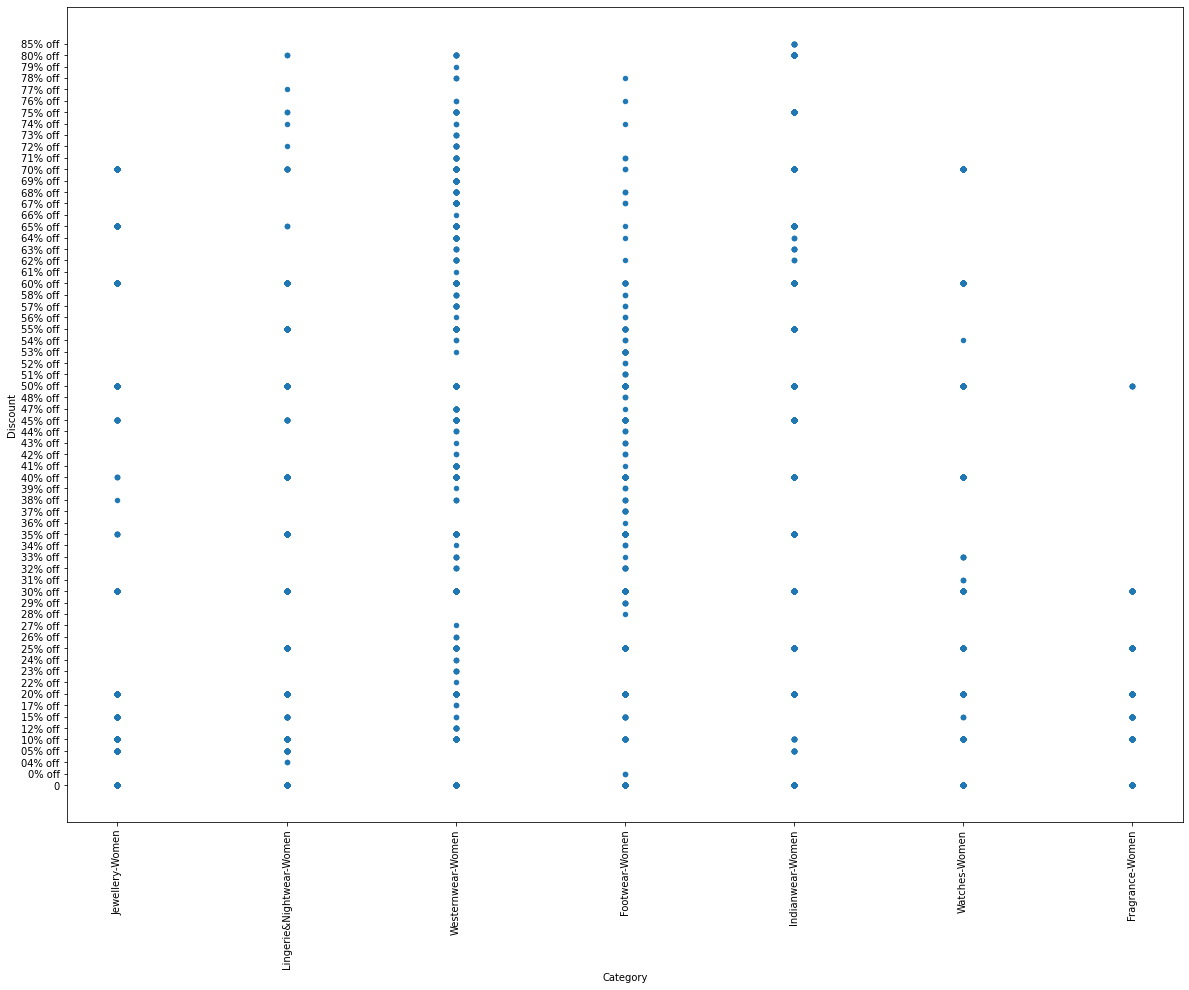

In [13]:
plot_cat = df.plot.scatter(x='Category', y='Discount', figsize=(20, 15), rot=90)

In [14]:
print(df['BrandName'].unique())

['estelle' 'enamor' 'life' 'amante' 'soie' 'kaftan company' 'campus sutra'
 'vero moda' 'Nan' 'emblaze' '109f' 'van heusen' 'gipsy' 'jockey' 'alcis'
 'allen solly tribe' 'fratini' 'global desi' 'levis' 'jealous 21' 'wacoal'
 'iti' 'w' 'samshek' 'groversons paris beauty' 'vip' 'triumph'
 'miss chase' 'indya' 'monte carlo' 'hidesign' 'puma' 'and' 'allen solly'
 'fila' 'sloggi' 'duke' 'adidas' 'latin quarters' 'stop' 'pepe'
 'cover story' 'only' 'ariana' 'zink z' 'disha patani for glam lifestyle'
 'ultimo' 'forever new' 'rukootina' 'de moza' 'biba' 'lovegen'
 'louis philippe' 'aarke' 'fastrack' 'giordano' 'ira soleil' 'infuse'
 'indian terrain' 'madame' 'high star' 'faballey' 'ceriz' 'inc.5' 'crocs'
 'elliza donatein' 'skechers' 'solethreads' 'tresmode' 'flipside'
 'von wellx' 'shoetopia' 'lazera shoes' 'lemon & pepper' 'doubleu'
 'clarks' 'get wrapped' 'modare' 'haute curry' 'havaianas' 'zingg'
 'altlife' 'monrow' 'vento' 'travel blue' 'insense' 'black panther'
 'u.s. polo assn.' 'sweet 

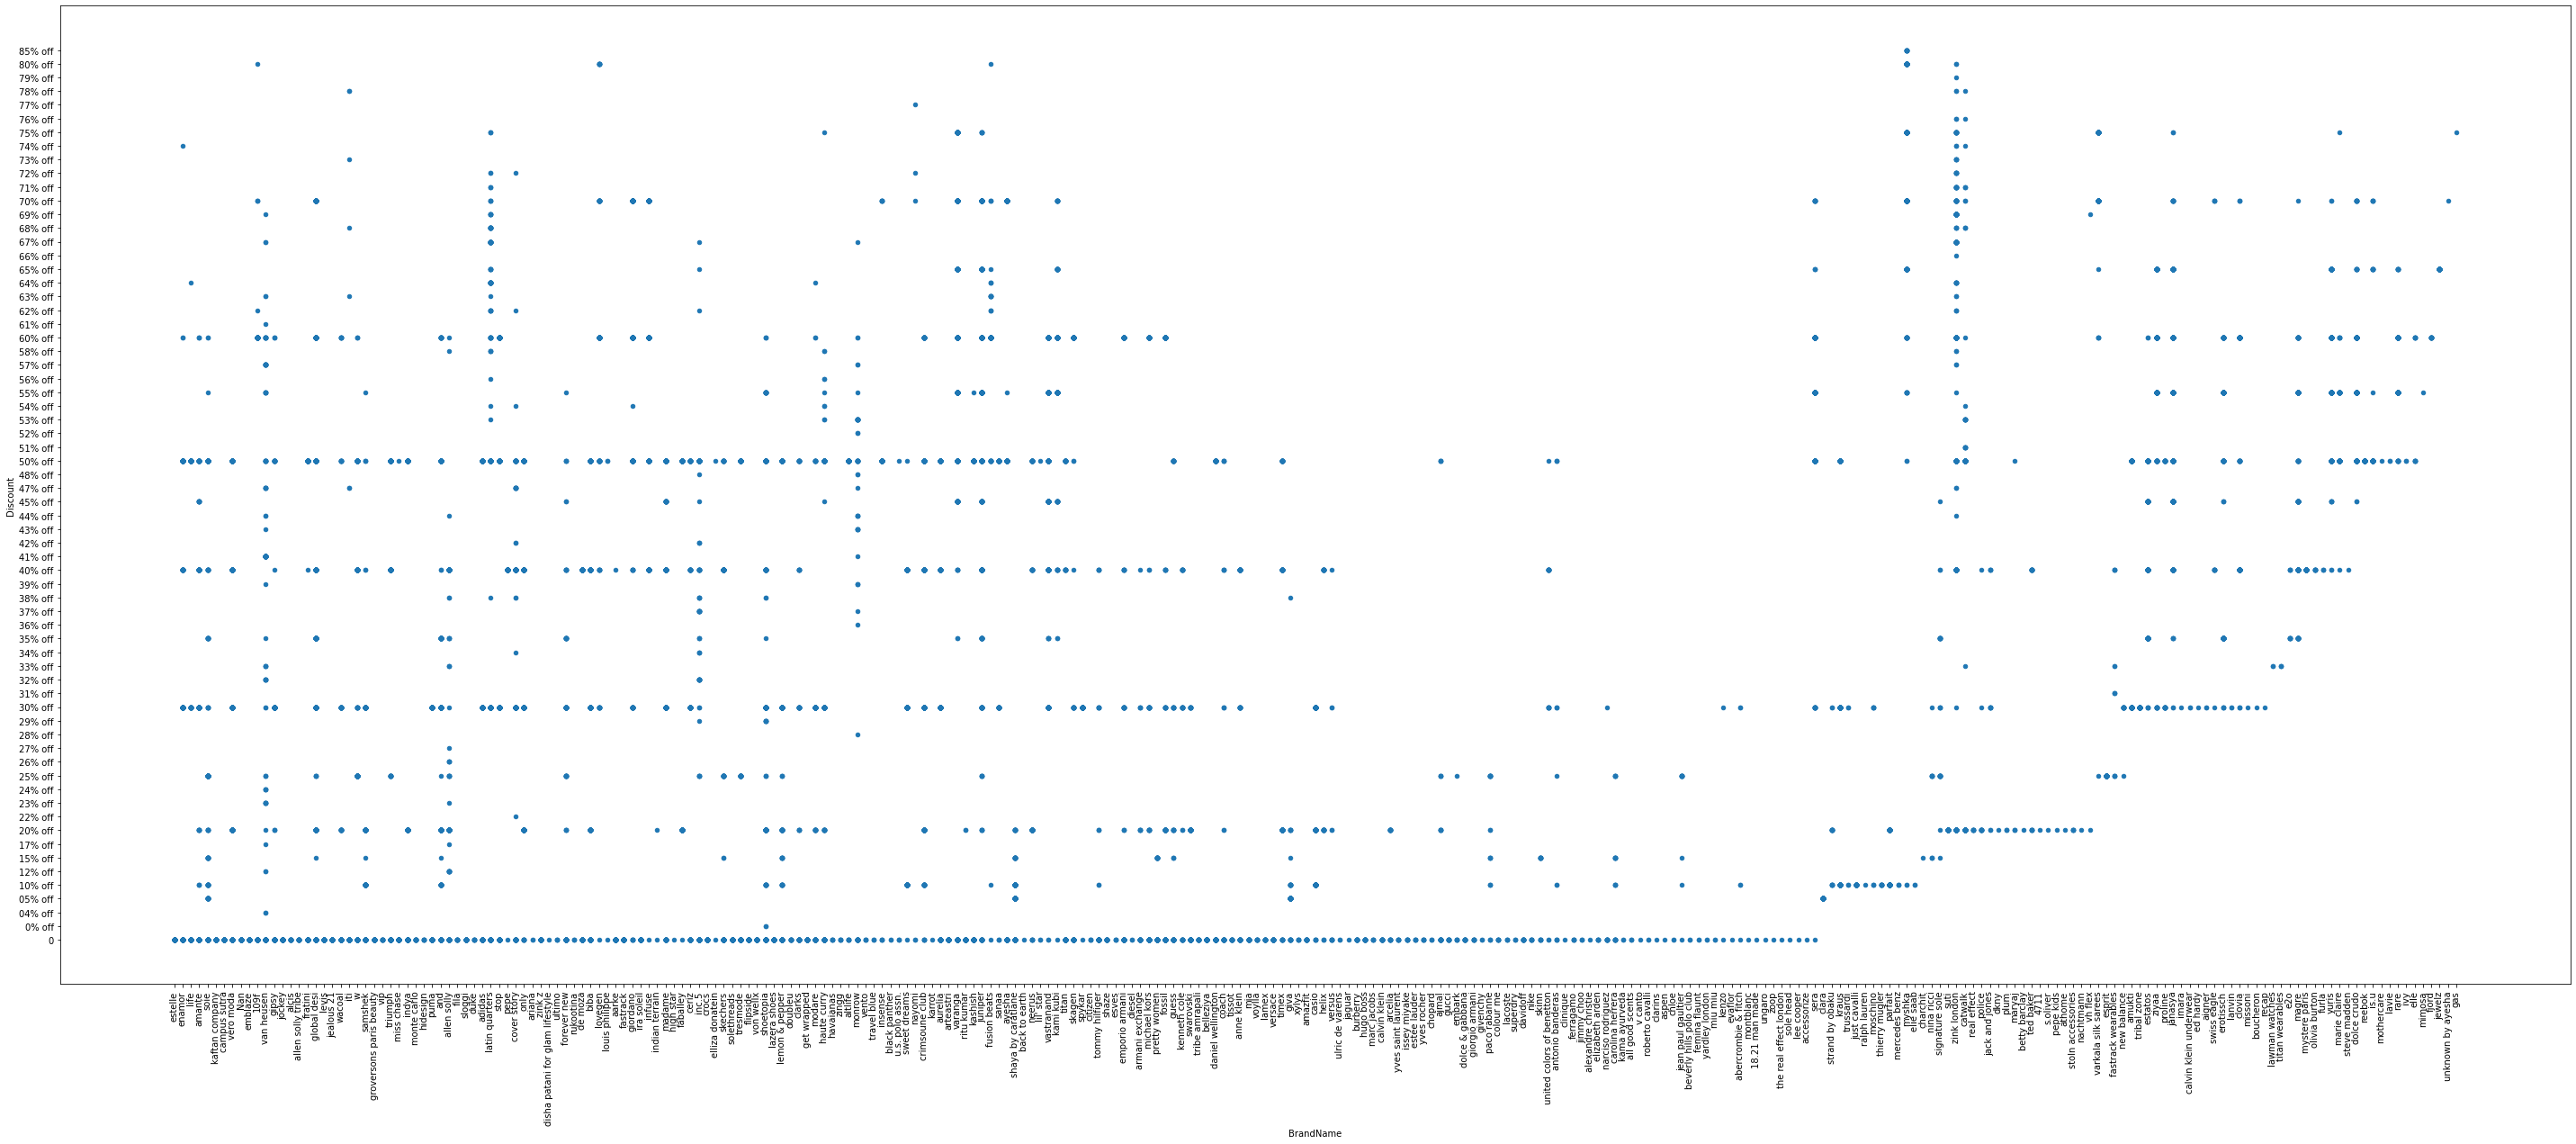

In [15]:
plot_brand = df.plot.scatter(x='BrandName', y='Discount', figsize=(50, 20), rot=90)

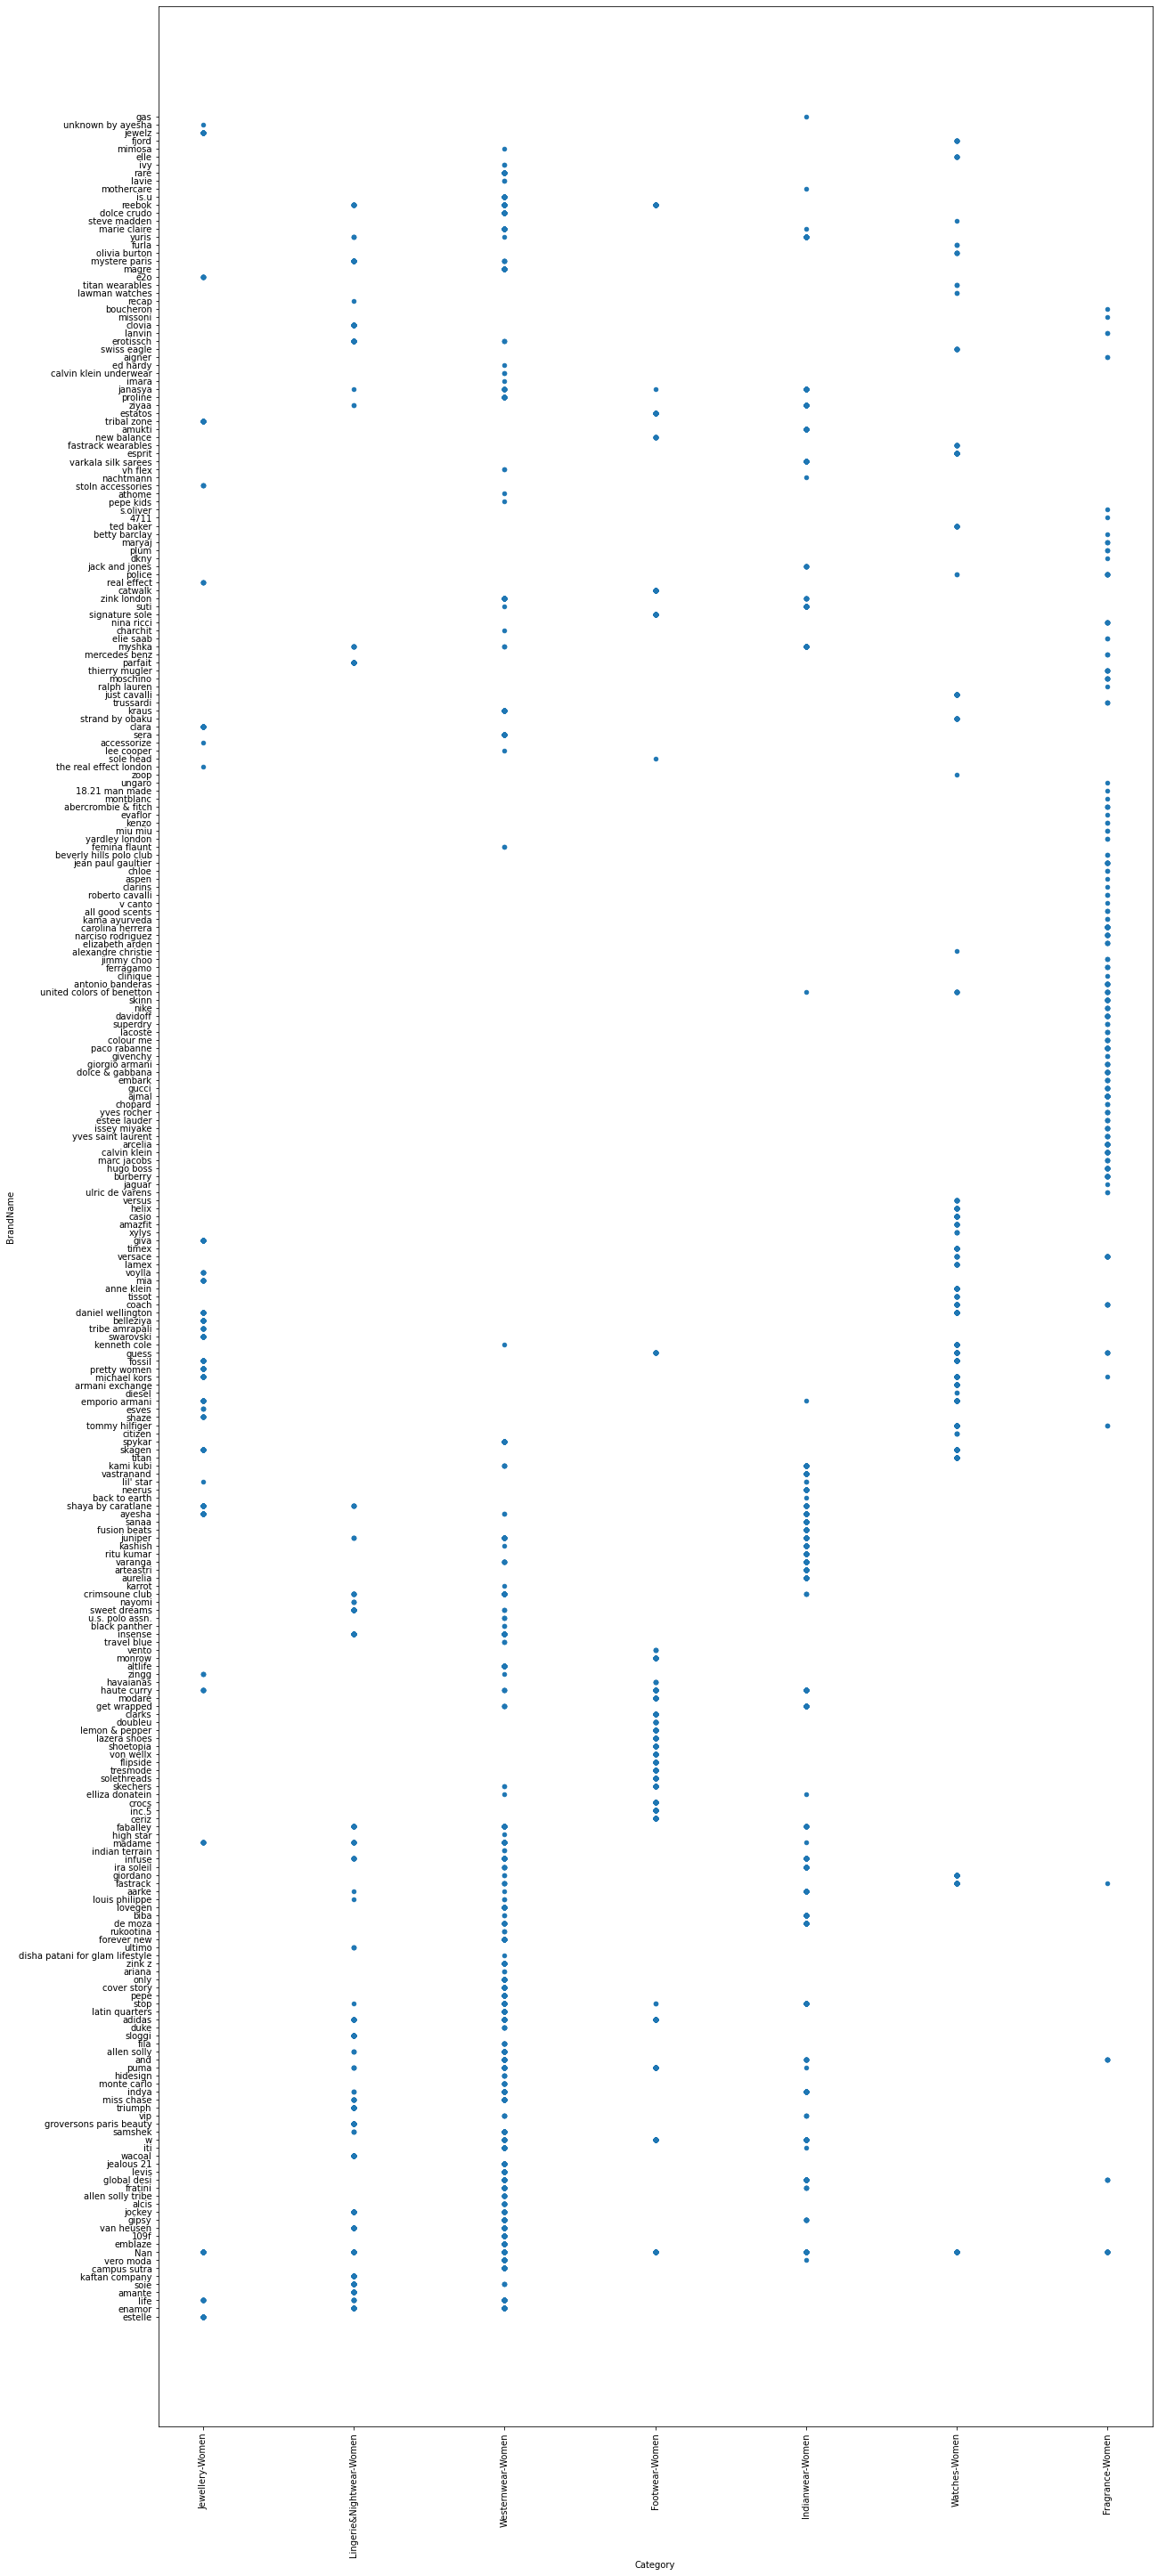

In [16]:
plot_brand_categories = df.plot.scatter(x='Category', y='BrandName', figsize=(20, 50), rot=90)

### Anomaly Detection

In [17]:
from sklearn.svm import OneClassSVM

In [ ]:
data = df[['Discount','SellPrice']]
data['Discount'] = data['Discount'].str[:2].replace({'0%':'0'})

In [43]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.01).fit(data)
y_pred = model.predict(data)

In [44]:
anomaly_values = data.iloc[np.where(y_pred == -1)]
print(anomaly_values)

      Discount  SellPrice
23463        0        499
8680         0          0
23448        0          0
8682         0       3800
8659         0       1049
...        ...        ...
11602       85        749
11523       85        749
10511       85        749
10409       85        644
11197       85        749

[4082 rows x 2 columns]


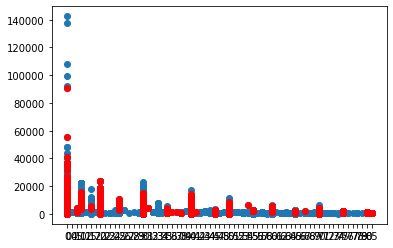

In [45]:
plt.scatter(data['Discount'], data['SellPrice'])
plt.scatter(anomaly_values['Discount'], anomaly_values['SellPrice'], c = 'r')